In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import LSTM

In [2]:
stock = "TSLA"
df = pd.DataFrame(yf.download(stock, '2020-01-01', '2022-12-31')["Close"])

[*********************100%***********************]  1 of 1 completed


In [3]:
def rolling(lag, data):
    A = []
    df = data.values
    for i in range(lag, len(df)):
        A.append(df[i-lag:i]) 
    return A

def train_test_split(x,y,test_size):
    i = int(len(x)*test_size)
    j = int(len(y)*test_size)
    return x[:i], x[i:], y[:j], y[j:]
               
def RNN(x, y, lag):
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(lag,1)))
    model.add(Dropout(0.5))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units=50))
    model.add(Dropout(0.3))
    model.add(Dense(units=1))

    #RMSProp is working fine with LSTM but so do ADAM optimizer
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(np.array(x), np.array(y), epochs=100, batch_size=32)
    return model

In [4]:
lag = 5
A = rolling(lag, df["Close"])
b = df["Close"].values[lag::]

deon, dete, keyon, keyte = train_test_split(A,b, test_size=0.3)

In [5]:
a = RNN(deon,keyon,lag)

Epoch 1/100
8/8 [==============================] - 11s 19ms/step - loss: 9370.0195
Epoch 2/100
8/8 [==============================] - 0s 16ms/step - loss: 9144.0449
Epoch 3/100
8/8 [==============================] - 0s 17ms/step - loss: 8770.9844
Epoch 4/100
8/8 [==============================] - 0s 19ms/step - loss: 8367.0039
Epoch 5/100
8/8 [==============================] - 0s 19ms/step - loss: 8094.8882
Epoch 6/100
8/8 [==============================] - 0s 16ms/step - loss: 7921.2437
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 7780.0249
Epoch 8/100
8/8 [==============================] - 0s 17ms/step - loss: 7716.8198
Epoch 9/100
8/8 [==============================] - 0s 12ms/step - loss: 7638.2271
Epoch 10/100
8/8 [==============================] - 0s 17ms/step - loss: 7550.5015
Epoch 11/100
8/8 [==============================] - 0s 19ms/step - loss: 7470.8296
Epoch 12/100
8/8 [==============================] - 0s 16ms/step - loss: 7392.8130
Epoch 13/100

24/24 [==============================] - 2s 11ms/step


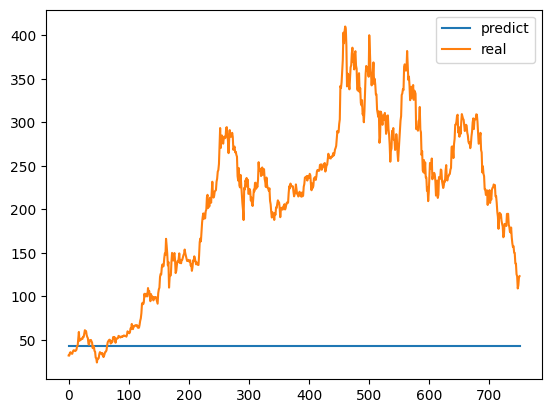

In [6]:
plt.plot(a.predict(np.array(A)), label="predict")
plt.plot(np.array(b), label="real")
plt.legend()
plt.show()